In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [48]:
datos=pd.read_csv("_02_lab_01_ConjuntoDatos Afectados.csv", encoding='latin-1')

In [49]:
datos.head()

,anio,mes,fproceso,sistema,desc_depe,dl_1057,dl_728,dl_276,categoria,cargo,sexo_f,sexo_m,tot_pers,cob_nac,id_df,distrito_fiscal
0,2018,12,03-01-19 0:00,Administrativo,0019 - ASOCIACIÓN DE DAMAS DEL MINISTERIO PÚ...,NaN,1.0,NaN,NaN,ASISTENTE ADMINISTRATIVO,NaN,1.0,1,S,17,LIMA
1,2018,12,03-01-19 0:00,Administrativo,0045 - OFICINA DE REGISTRO NACIONAL DE DETEN...,NaN,NaN,1.0,TECNICO,TECNICO EN ABOGACIA II,1.0,0.0,1,NaN,4,AREQUIPA
2,2018,12,03-01-19 0:00,Administrativo,0046 - OFICINA DE REGISTRO NACIONAL DE DETEN...,1.0,NaN,NaN,TECNICO,ASISTENTE ADMINISTRATIVO,NaN,1.0,1,NaN,5,AYACUCHO
3,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,22.0,6.0,NaN,NaN,ABOGADO,15.0,13.0,28,S,17,LIMA
4,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,NaN,1.0,NaN,PROFESIONAL,ANALISTA,NaN,1.0,1,S,17,LIMA


In [50]:
datos.describe()

,anio,mes,dl_1057,dl_728,dl_276,sexo_f,sexo_m,tot_pers,id_df
count,8221.0,8221.0,1816.000000,3492.000000,3363.000000,5063.000000,5453.000000,8221.000000,8221.000000
mean,2018.0,12.0,2.856828,2.209908,2.245911,1.844559,2.039061,2.488505,16.130276
std,0.0,0.0,7.522996,2.954304,4.098927,3.260659,3.848962,5.103123,8.922861
min,2018.0,12.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,2018.0,12.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000
50%,2018.0,12.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000
75%,2018.0,12.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,22.000000
max,2018.0,12.0,193.000000,48.000000,174.000000,121.000000,151.000000,193.000000,34.000000


In [51]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8221 entries, 0 to 8220
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anio             8221 non-null   int64  
 1   mes              8221 non-null   int64  
 2   fproceso         8221 non-null   object 
 3   sistema          8221 non-null   object 
 4   desc_depe        8221 non-null   object 
 5   dl_1057          1816 non-null   float64
 6   dl_728           3492 non-null   float64
 7   dl_276           3363 non-null   float64
 8   categoria        8219 non-null   object 
 9   cargo            8221 non-null   object 
 10  sexo_f           5063 non-null   float64
 11  sexo_m           5453 non-null   float64
 12  tot_pers         8221 non-null   int64  
 13  cob_nac          633 non-null    object 
 14  id_df            8221 non-null   int64  
 15  distrito_fiscal  8221 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory usage: 1.0+ MB


In [52]:
## Buscar nulos e imputar con (promedio, max, min, moda, predicción)

In [53]:
print(datos.isnull().any().any())

True


In [54]:
datos.isna().sum().sort_values()

anio                  0
mes                   0
fproceso              0
sistema               0
desc_depe             0
id_df                 0
distrito_fiscal       0
cargo                 0
tot_pers              0
categoria             2
sexo_m             2768
sexo_f             3158
dl_728             4729
dl_276             4858
dl_1057            6405
cob_nac            7588
dtype: int64

In [55]:
tipos = datos.columns.to_series().groupby(datos.dtypes).groups
print(tipos)

{int64: ['anio', 'mes', 'tot_pers', 'id_df'], float64: ['dl_1057', 'dl_728', 'dl_276', 'sexo_f', 'sexo_m'], object: ['fproceso', 'sistema', 'desc_depe', 'categoria', 'cargo', 'cob_nac', 'distrito_fiscal']}


In [56]:
## Listando variables categóricos
import numpy as np
colText = tipos[np.dtype('object')]
print(colText)
print(len(colText))

Index(['fproceso', 'sistema', 'desc_depe', 'categoria', 'cargo', 'cob_nac',
       'distrito_fiscal'],
      dtype='object')
7


In [57]:
## Listando atributos numericos
columnas = datos.columns
colNum = list(set(columnas)-set(colText))
print(colNum)
print(len(colNum))

['anio', 'sexo_m', 'dl_276', 'id_df', 'tot_pers', 'mes', 'dl_1057', 'dl_728', 'sexo_f']
9


In [58]:
### Detectar posibles valores 0

cols = datos[datos == 0].count(axis=0)
print(cols)
print("....---")
print(cols[cols > 0])

anio               0
mes                0
fproceso           0
sistema            0
desc_depe          0
dl_1057            0
dl_728             0
dl_276             0
categoria          0
cargo              0
sexo_f             0
sexo_m             1
tot_pers           0
cob_nac            0
id_df              0
distrito_fiscal    0
dtype: int64
....---
sexo_m    1
dtype: int64


In [59]:
# imputamos con la mediana, moda y el promedio

In [60]:
censo=datos.copy()

In [61]:
from sklearn.impute import SimpleImputer

censo_constant = censo.copy()
censo_constant_2 = censo.copy()

<Axes: >

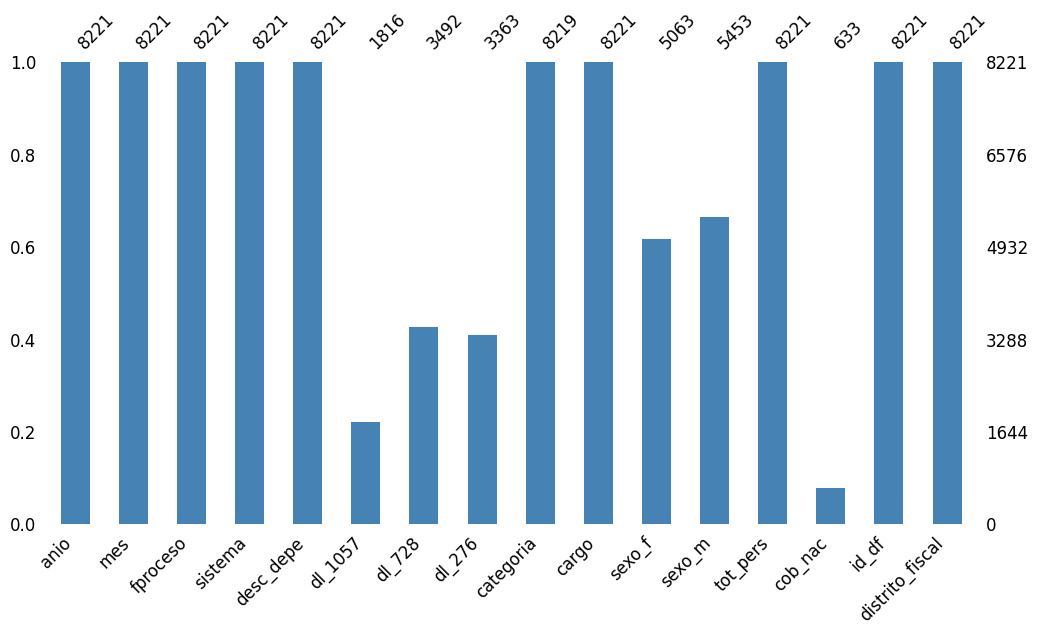

In [62]:
import missingno as msno

msno.bar(censo_constant,figsize=(12, 6), fontsize=12, color='steelblue')

<Axes: >

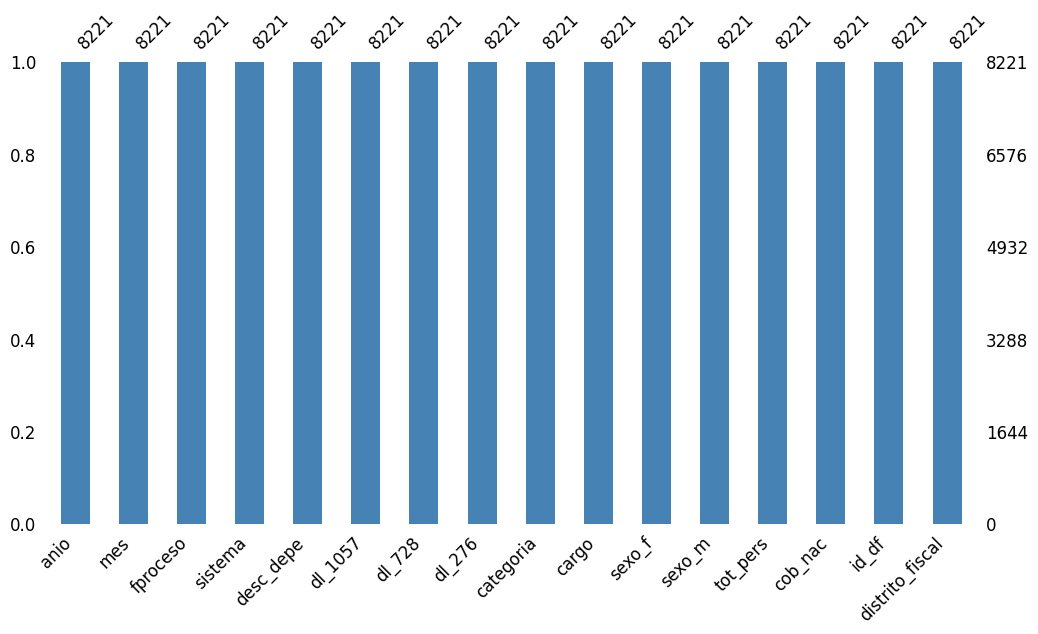

In [63]:
## imputamos con la media

import missingno as msno

mean_imputer = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0) 

censo_constant.iloc[:,:] = mean_imputer.fit_transform(censo_constant)

msno.bar(censo_constant,figsize=(12, 6), fontsize=12, color='steelblue')

In [64]:
censo_constant.head()

,anio,mes,fproceso,sistema,desc_depe,dl_1057,dl_728,dl_276,categoria,cargo,sexo_f,sexo_m,tot_pers,cob_nac,id_df,distrito_fiscal
0,2018,12,03-01-19 0:00,Administrativo,0019 - ASOCIACIÓN DE DAMAS DEL MINISTERIO PÚ...,0.0,1.0,0.0,0,ASISTENTE ADMINISTRATIVO,0.0,1.0,1,S,17,LIMA
1,2018,12,03-01-19 0:00,Administrativo,0045 - OFICINA DE REGISTRO NACIONAL DE DETEN...,0.0,0.0,1.0,TECNICO,TECNICO EN ABOGACIA II,1.0,0.0,1,0,4,AREQUIPA
2,2018,12,03-01-19 0:00,Administrativo,0046 - OFICINA DE REGISTRO NACIONAL DE DETEN...,1.0,0.0,0.0,TECNICO,ASISTENTE ADMINISTRATIVO,0.0,1.0,1,0,5,AYACUCHO
3,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,22.0,6.0,0.0,0,ABOGADO,15.0,13.0,28,S,17,LIMA
4,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,0.0,1.0,0.0,PROFESIONAL,ANALISTA,0.0,1.0,1,S,17,LIMA


,anio,mes,fproceso,sistema,desc_depe,dl_1057,dl_728,dl_276,categoria,cargo,sexo_f,sexo_m,tot_pers,cob_nac,id_df,distrito_fiscal
0,2018,12,03-01-19 0:00,Administrativo,0019 - ASOCIACIÓN DE DAMAS DEL MINISTERIO PÚ...,0.0,1.0,0.0,0,ASISTENTE ADMINISTRATIVO,0.0,1.0,1,S,17,LIMA
1,2018,12,03-01-19 0:00,Administrativo,0045 - OFICINA DE REGISTRO NACIONAL DE DETEN...,0.0,0.0,1.0,TECNICO,TECNICO EN ABOGACIA II,1.0,0.0,1,0,4,AREQUIPA
2,2018,12,03-01-19 0:00,Administrativo,0046 - OFICINA DE REGISTRO NACIONAL DE DETEN...,1.0,0.0,0.0,TECNICO,ASISTENTE ADMINISTRATIVO,0.0,1.0,1,0,5,AYACUCHO
3,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,22.0,6.0,0.0,0,ABOGADO,15.0,13.0,28,S,17,LIMA
4,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,0.0,1.0,0.0,PROFESIONAL,ANALISTA,0.0,1.0,1,S,17,LIMA


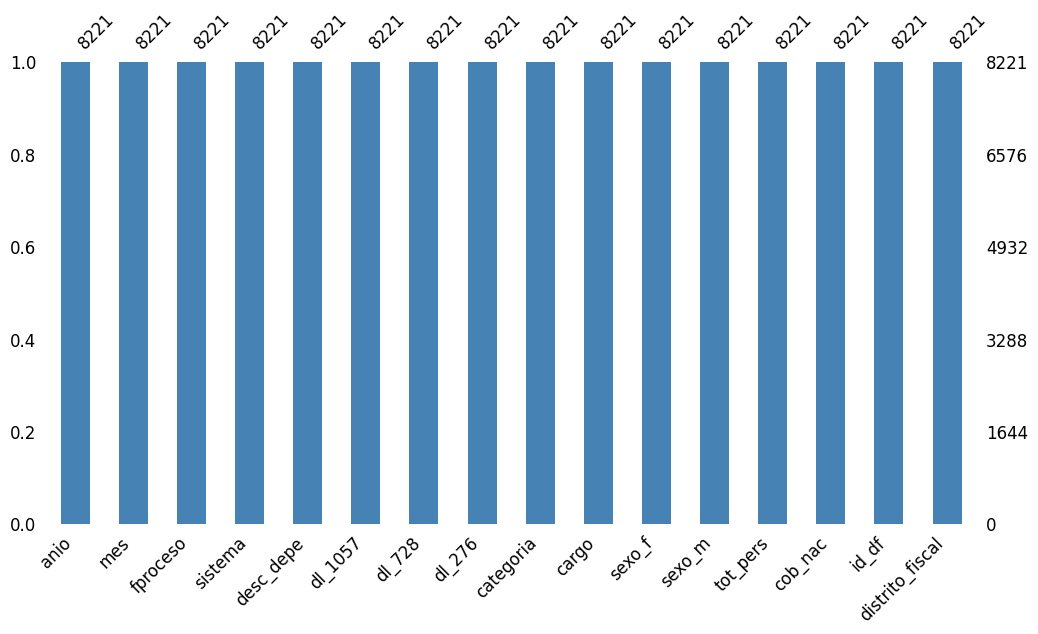

In [65]:
## imputamos con la moda

import missingno as msno

mean_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent',fill_value=0) 

censo_constant_2.iloc[:,:] = mean_imputer.fit_transform(censo_constant)

msno.bar(censo_constant_2,figsize=(12, 6), fontsize=12, color='steelblue')
censo_constant_2.head()

In [66]:
## Utilizando filtros basado en un atributo, borrar las instancias dado un valor específico o un rango de valores
personas=pd.cut(censo_constant['tot_pers'],[0,20,40,60,200])
print(personas)
# print(pd.value_counts(personas))
print(pd.Series(personas).value_counts())

0        (0, 20]
1        (0, 20]
2        (0, 20]
3       (20, 40]
4        (0, 20]
          ...   
8216     (0, 20]
8217     (0, 20]
8218     (0, 20]
8219     (0, 20]
8220     (0, 20]
Name: tot_pers, Length: 8221, dtype: category
Categories (4, interval[int64, right]): [(0, 20] < (20, 40] < (40, 60] < (60, 200]]
tot_pers
(0, 20]      8150
(20, 40]       52
(40, 60]       13
(60, 200]       6
Name: count, dtype: int64


In [67]:
censo_constant=censo_constant.drop(censo_constant[censo_constant['tot_pers']>60 ].index)

In [68]:
censo_constant.head()

,anio,mes,fproceso,sistema,desc_depe,dl_1057,dl_728,dl_276,categoria,cargo,sexo_f,sexo_m,tot_pers,cob_nac,id_df,distrito_fiscal
0,2018,12,03-01-19 0:00,Administrativo,0019 - ASOCIACIÓN DE DAMAS DEL MINISTERIO PÚ...,0.0,1.0,0.0,0,ASISTENTE ADMINISTRATIVO,0.0,1.0,1,S,17,LIMA
1,2018,12,03-01-19 0:00,Administrativo,0045 - OFICINA DE REGISTRO NACIONAL DE DETEN...,0.0,0.0,1.0,TECNICO,TECNICO EN ABOGACIA II,1.0,0.0,1,0,4,AREQUIPA
2,2018,12,03-01-19 0:00,Administrativo,0046 - OFICINA DE REGISTRO NACIONAL DE DETEN...,1.0,0.0,0.0,TECNICO,ASISTENTE ADMINISTRATIVO,0.0,1.0,1,0,5,AYACUCHO
3,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,22.0,6.0,0.0,0,ABOGADO,15.0,13.0,28,S,17,LIMA
4,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,0.0,1.0,0.0,PROFESIONAL,ANALISTA,0.0,1.0,1,S,17,LIMA


In [69]:
## Cambiar tipo de atributo
censo_constant['sexo_f'] = censo_constant['sexo_f'].apply(np.int64)
censo_constant['sexo_m'] = censo_constant['sexo_m'].apply(np.int64)

In [70]:
censo_constant.head()

,anio,mes,fproceso,sistema,desc_depe,dl_1057,dl_728,dl_276,categoria,cargo,sexo_f,sexo_m,tot_pers,cob_nac,id_df,distrito_fiscal
0,2018,12,03-01-19 0:00,Administrativo,0019 - ASOCIACIÓN DE DAMAS DEL MINISTERIO PÚ...,0.0,1.0,0.0,0,ASISTENTE ADMINISTRATIVO,0,1,1,S,17,LIMA
1,2018,12,03-01-19 0:00,Administrativo,0045 - OFICINA DE REGISTRO NACIONAL DE DETEN...,0.0,0.0,1.0,TECNICO,TECNICO EN ABOGACIA II,1,0,1,0,4,AREQUIPA
2,2018,12,03-01-19 0:00,Administrativo,0046 - OFICINA DE REGISTRO NACIONAL DE DETEN...,1.0,0.0,0.0,TECNICO,ASISTENTE ADMINISTRATIVO,0,1,1,0,5,AYACUCHO
3,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,22.0,6.0,0.0,0,ABOGADO,15,13,28,S,17,LIMA
4,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,0.0,1.0,0.0,PROFESIONAL,ANALISTA,0,1,1,S,17,LIMA


In [71]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

## Reemplazar un valor por otro valor ejemplo elementos 1,2,3 a A,B,C
labels = censo_constant['categoria'].astype('category').cat.categories.tolist()
replace_map_comp = {'categoria' : {k: v for k,v in zip(labels,list(range(0,len(labels)+1)))}}

print(replace_map_comp)
censo_constant_3 = censo_constant.copy()
# censo_constant_3.replace(replace_map_comp, inplace=True)
censo_constant_3.replace(replace_map_comp, inplace=True)

censo_constant_3.head()

{'categoria': {0: 0, 'AUXILIAR': 1, 'FUNCIONARIO': 2, 'MAGISTRADO': 3, 'OTROS (ASISTENTES DE GESTION)': 4, 'PROFESIONAL': 5, 'PROFESIONAL DE LA SALUD': 6, 'TECNICO': 7}}


,anio,mes,fproceso,sistema,desc_depe,dl_1057,dl_728,dl_276,categoria,cargo,sexo_f,sexo_m,tot_pers,cob_nac,id_df,distrito_fiscal
0,2018,12,03-01-19 0:00,Administrativo,0019 - ASOCIACIÓN DE DAMAS DEL MINISTERIO PÚ...,0.0,1.0,0.0,0,ASISTENTE ADMINISTRATIVO,0,1,1,S,17,LIMA
1,2018,12,03-01-19 0:00,Administrativo,0045 - OFICINA DE REGISTRO NACIONAL DE DETEN...,0.0,0.0,1.0,7,TECNICO EN ABOGACIA II,1,0,1,0,4,AREQUIPA
2,2018,12,03-01-19 0:00,Administrativo,0046 - OFICINA DE REGISTRO NACIONAL DE DETEN...,1.0,0.0,0.0,7,ASISTENTE ADMINISTRATIVO,0,1,1,0,5,AYACUCHO
3,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,22.0,6.0,0.0,0,ABOGADO,15,13,28,S,17,LIMA
4,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,0.0,1.0,0.0,5,ANALISTA,0,1,1,S,17,LIMA


In [72]:
## Reemplazar un valor por otro valor ejemplo elementos 1,2,3 a A,B,C
labels = censo_constant['cargo'].astype('category').cat.categories.tolist()
replace_map_comp = {'cargo' : {k: v for k,v in zip(labels,list(range(0,len(labels)+1)))}}

print(replace_map_comp)
censo_constant_4 = censo_constant_3.copy()
censo_constant_4.replace(replace_map_comp, inplace=True)

censo_constant_4.head()

{'cargo': {'ABOGADO': 0, 'ABOGADO I': 1, 'ABOGADO II': 2, 'ADMINISTRADOR': 3, 'ADMINISTRADOR (JEFE DE AREA)': 4, 'ANALISTA': 5, 'ANALISTA II': 6, 'ANTROPOLOGO': 7, 'ARQUEOLOGO': 8, 'ASESOR': 9, 'ASESOR LEGAL': 10, 'ASISTENTE ADMINISTRATIVO': 11, 'ASISTENTE ADMINISTRATIVO (CONDUCTOR)': 12, 'ASISTENTE ADMINISTRATIVO (NOTIFICADOR)': 13, 'ASISTENTE DE FUNCION FISCAL': 14, 'ASISTENTE DE GESTION': 15, 'ASISTENTE MEDICO LEGAL': 16, 'AUXILIAR ADMINISTRATIVO': 17, 'AUXILIAR DE COCINA': 18, 'AUXILIAR DE EDUCACION': 19, 'AUXILIAR DE MORGUE I': 20, 'AUXILIAR DE SIST. ADMINISTRATIVO II': 21, 'BIOLOGO': 22, 'CHEF': 23, 'CHOFER II': 24, 'CIRUJANO DENTISTA': 25, 'CIRUJANO DENTISTA I': 26, 'COCINERA': 27, 'CONSULTOR': 28, 'CONTADOR': 29, 'COORDINADOR': 30, 'COORDINADOR I': 31, 'COORDINADOR II': 32, 'DIRECTOR': 33, 'ENFERMERA II': 34, 'ESPECIALISTA ADMINISTRATIVO': 35, 'ESPECIALISTA ADMINISTRATIVO I': 36, 'ESPECIALISTA ADMINISTRATIVO III': 37, 'ESPECIALISTA ADMINISTRATIVO IV': 38, 'ESPECIALISTA EN FINAN

,anio,mes,fproceso,sistema,desc_depe,dl_1057,dl_728,dl_276,categoria,cargo,sexo_f,sexo_m,tot_pers,cob_nac,id_df,distrito_fiscal
0,2018,12,03-01-19 0:00,Administrativo,0019 - ASOCIACIÓN DE DAMAS DEL MINISTERIO PÚ...,0.0,1.0,0.0,0,11,0,1,1,S,17,LIMA
1,2018,12,03-01-19 0:00,Administrativo,0045 - OFICINA DE REGISTRO NACIONAL DE DETEN...,0.0,0.0,1.0,7,85,1,0,1,0,4,AREQUIPA
2,2018,12,03-01-19 0:00,Administrativo,0046 - OFICINA DE REGISTRO NACIONAL DE DETEN...,1.0,0.0,0.0,7,11,0,1,1,0,5,AYACUCHO
3,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,22.0,6.0,0.0,0,0,15,13,28,S,17,LIMA
4,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,0.0,1.0,0.0,5,5,0,1,1,S,17,LIMA


In [73]:
##Borrar columna basado en alguna condición
newdata_01 = censo_constant_4.copy()
cont_cero_cob_nac = newdata_01[newdata_01['cob_nac'] == 0]['cob_nac'].count()
print(cont_cero_cob_nac)
if cont_cero_cob_nac >= 1:
  newdata_01 = newdata_01.drop(['cob_nac'], axis=1)
  print('Se elimino la columna "cob_nac" de la BD')
else:
  print('No se elimno la columna "cob_nac" de la BD')
newdata_01

7583
Se elimino la columna "cob_nac" de la BD


,anio,mes,fproceso,sistema,desc_depe,dl_1057,dl_728,dl_276,categoria,cargo,sexo_f,sexo_m,tot_pers,id_df,distrito_fiscal
0,2018,12,03-01-19 0:00,Administrativo,0019 - ASOCIACIÓN DE DAMAS DEL MINISTERIO PÚ...,0.0,1.0,0.0,0,11,0,1,1,17,LIMA
1,2018,12,03-01-19 0:00,Administrativo,0045 - OFICINA DE REGISTRO NACIONAL DE DETEN...,0.0,0.0,1.0,7,85,1,0,1,4,AREQUIPA
2,2018,12,03-01-19 0:00,Administrativo,0046 - OFICINA DE REGISTRO NACIONAL DE DETEN...,1.0,0.0,0.0,7,11,0,1,1,5,AYACUCHO
3,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,22.0,6.0,0.0,0,0,15,13,28,17,LIMA
4,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,0.0,1.0,0.0,5,5,0,1,1,17,LIMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8216,2018,12,03-01-19 0:00,Medico Legal,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,0.0,9.0,0.0,5,71,3,6,9,17,LIMA
8217,2018,12,03-01-19 0:00,Medico Legal,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,1.0,0.0,0.0,2,79,0,1,1,17,LIMA
8218,2018,12,03-01-19 0:00,Medico Legal,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,1.0,0.0,0.0,7,88,1,0,1,17,LIMA
8219,2018,12,03-01-19 0:00,Medico Legal,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,0.0,0.0,1.0,7,89,1,0,1,17,LIMA


In [74]:
## Borrar filas basado en alguna condición
indexdl = censo_constant_4[ (censo_constant_4['dl_1057'] >= 20) & (censo_constant_4['dl_1057'] <= 30) ].index
censo_constant_4.drop(indexdl , inplace=True)
censo_constant_4.head()

,anio,mes,fproceso,sistema,desc_depe,dl_1057,dl_728,dl_276,categoria,cargo,sexo_f,sexo_m,tot_pers,cob_nac,id_df,distrito_fiscal
0,2018,12,03-01-19 0:00,Administrativo,0019 - ASOCIACIÓN DE DAMAS DEL MINISTERIO PÚ...,0.0,1.0,0.0,0,11,0,1,1,S,17,LIMA
1,2018,12,03-01-19 0:00,Administrativo,0045 - OFICINA DE REGISTRO NACIONAL DE DETEN...,0.0,0.0,1.0,7,85,1,0,1,0,4,AREQUIPA
2,2018,12,03-01-19 0:00,Administrativo,0046 - OFICINA DE REGISTRO NACIONAL DE DETEN...,1.0,0.0,0.0,7,11,0,1,1,0,5,AYACUCHO
4,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,0.0,1.0,0.0,5,5,0,1,1,S,17,LIMA
5,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,1.0,0.0,0.0,2,9,1,0,1,S,17,LIMA


In [75]:
## Utilizando operadores como > < = borrar, modificar, insertar datos
censo_constant_4.loc[censo_constant_4['sexo_f'] > 10, 'sexo_f'] = 14
censo_constant_4

,anio,mes,fproceso,sistema,desc_depe,dl_1057,dl_728,dl_276,categoria,cargo,sexo_f,sexo_m,tot_pers,cob_nac,id_df,distrito_fiscal
0,2018,12,03-01-19 0:00,Administrativo,0019 - ASOCIACIÓN DE DAMAS DEL MINISTERIO PÚ...,0.0,1.0,0.0,0,11,0,1,1,S,17,LIMA
1,2018,12,03-01-19 0:00,Administrativo,0045 - OFICINA DE REGISTRO NACIONAL DE DETEN...,0.0,0.0,1.0,7,85,1,0,1,0,4,AREQUIPA
2,2018,12,03-01-19 0:00,Administrativo,0046 - OFICINA DE REGISTRO NACIONAL DE DETEN...,1.0,0.0,0.0,7,11,0,1,1,0,5,AYACUCHO
4,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,0.0,1.0,0.0,5,5,0,1,1,S,17,LIMA
5,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,1.0,0.0,0.0,2,9,1,0,1,S,17,LIMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8216,2018,12,03-01-19 0:00,Medico Legal,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,0.0,9.0,0.0,5,71,3,6,9,S,17,LIMA
8217,2018,12,03-01-19 0:00,Medico Legal,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,1.0,0.0,0.0,2,79,0,1,1,S,17,LIMA
8218,2018,12,03-01-19 0:00,Medico Legal,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,1.0,0.0,0.0,7,88,1,0,1,S,17,LIMA
8219,2018,12,03-01-19 0:00,Medico Legal,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,0.0,0.0,1.0,7,89,1,0,1,S,17,LIMA


In [76]:
## Utilizando operadores como > < = borrar, modificar, insertar datos
censo_constant_4.loc[censo_constant_3['sexo_f'] < 10, 'sexo_f'] = 5
censo_constant_4

,anio,mes,fproceso,sistema,desc_depe,dl_1057,dl_728,dl_276,categoria,cargo,sexo_f,sexo_m,tot_pers,cob_nac,id_df,distrito_fiscal
0,2018,12,03-01-19 0:00,Administrativo,0019 - ASOCIACIÓN DE DAMAS DEL MINISTERIO PÚ...,0.0,1.0,0.0,0,11,5,1,1,S,17,LIMA
1,2018,12,03-01-19 0:00,Administrativo,0045 - OFICINA DE REGISTRO NACIONAL DE DETEN...,0.0,0.0,1.0,7,85,5,0,1,0,4,AREQUIPA
2,2018,12,03-01-19 0:00,Administrativo,0046 - OFICINA DE REGISTRO NACIONAL DE DETEN...,1.0,0.0,0.0,7,11,5,1,1,0,5,AYACUCHO
4,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,0.0,1.0,0.0,5,5,5,1,1,S,17,LIMA
5,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,1.0,0.0,0.0,2,9,5,0,1,S,17,LIMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8216,2018,12,03-01-19 0:00,Medico Legal,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,0.0,9.0,0.0,5,71,5,6,9,S,17,LIMA
8217,2018,12,03-01-19 0:00,Medico Legal,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,1.0,0.0,0.0,2,79,5,1,1,S,17,LIMA
8218,2018,12,03-01-19 0:00,Medico Legal,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,1.0,0.0,0.0,7,88,5,0,1,S,17,LIMA
8219,2018,12,03-01-19 0:00,Medico Legal,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,0.0,0.0,1.0,7,89,5,0,1,S,17,LIMA


In [77]:
## Utilizando operadores como > < = borrar, modificar, insertar datos
censo_constant_4.loc[censo_constant_4['sexo_f'] == 5, 'sexo_f'] = 7
censo_constant_4

,anio,mes,fproceso,sistema,desc_depe,dl_1057,dl_728,dl_276,categoria,cargo,sexo_f,sexo_m,tot_pers,cob_nac,id_df,distrito_fiscal
0,2018,12,03-01-19 0:00,Administrativo,0019 - ASOCIACIÓN DE DAMAS DEL MINISTERIO PÚ...,0.0,1.0,0.0,0,11,7,1,1,S,17,LIMA
1,2018,12,03-01-19 0:00,Administrativo,0045 - OFICINA DE REGISTRO NACIONAL DE DETEN...,0.0,0.0,1.0,7,85,7,0,1,0,4,AREQUIPA
2,2018,12,03-01-19 0:00,Administrativo,0046 - OFICINA DE REGISTRO NACIONAL DE DETEN...,1.0,0.0,0.0,7,11,7,1,1,0,5,AYACUCHO
4,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,0.0,1.0,0.0,5,5,7,1,1,S,17,LIMA
5,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,1.0,0.0,0.0,2,9,7,0,1,S,17,LIMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8216,2018,12,03-01-19 0:00,Medico Legal,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,0.0,9.0,0.0,5,71,7,6,9,S,17,LIMA
8217,2018,12,03-01-19 0:00,Medico Legal,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,1.0,0.0,0.0,2,79,7,1,1,S,17,LIMA
8218,2018,12,03-01-19 0:00,Medico Legal,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,1.0,0.0,0.0,7,88,7,0,1,S,17,LIMA
8219,2018,12,03-01-19 0:00,Medico Legal,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,0.0,0.0,1.0,7,89,7,0,1,S,17,LIMA


In [78]:
## Multiplicadores constantes a un atributo
censo_constant_4['dl_1057'] = censo_constant_4[["dl_1057"]].multiply(2, axis="index")
censo_constant_4

,anio,mes,fproceso,sistema,desc_depe,dl_1057,dl_728,dl_276,categoria,cargo,sexo_f,sexo_m,tot_pers,cob_nac,id_df,distrito_fiscal
0,2018,12,03-01-19 0:00,Administrativo,0019 - ASOCIACIÓN DE DAMAS DEL MINISTERIO PÚ...,0.0,1.0,0.0,0,11,7,1,1,S,17,LIMA
1,2018,12,03-01-19 0:00,Administrativo,0045 - OFICINA DE REGISTRO NACIONAL DE DETEN...,0.0,0.0,1.0,7,85,7,0,1,0,4,AREQUIPA
2,2018,12,03-01-19 0:00,Administrativo,0046 - OFICINA DE REGISTRO NACIONAL DE DETEN...,2.0,0.0,0.0,7,11,7,1,1,0,5,AYACUCHO
4,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,0.0,1.0,0.0,5,5,7,1,1,S,17,LIMA
5,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,2.0,0.0,0.0,2,9,7,0,1,S,17,LIMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8216,2018,12,03-01-19 0:00,Medico Legal,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,0.0,9.0,0.0,5,71,7,6,9,S,17,LIMA
8217,2018,12,03-01-19 0:00,Medico Legal,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,2.0,0.0,0.0,2,79,7,1,1,S,17,LIMA
8218,2018,12,03-01-19 0:00,Medico Legal,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,2.0,0.0,0.0,7,88,7,0,1,S,17,LIMA
8219,2018,12,03-01-19 0:00,Medico Legal,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,0.0,0.0,1.0,7,89,7,0,1,S,17,LIMA


In [79]:
## Multiplicadores basado en condiciones
censo_constant_4.loc[censo_constant_4['dl_276'] > 0, 'dl_276'] = censo_constant_4[["dl_276"]].multiply(2, axis="index")
censo_constant_4

,anio,mes,fproceso,sistema,desc_depe,dl_1057,dl_728,dl_276,categoria,cargo,sexo_f,sexo_m,tot_pers,cob_nac,id_df,distrito_fiscal
0,2018,12,03-01-19 0:00,Administrativo,0019 - ASOCIACIÓN DE DAMAS DEL MINISTERIO PÚ...,0.0,1.0,0.0,0,11,7,1,1,S,17,LIMA
1,2018,12,03-01-19 0:00,Administrativo,0045 - OFICINA DE REGISTRO NACIONAL DE DETEN...,0.0,0.0,2.0,7,85,7,0,1,0,4,AREQUIPA
2,2018,12,03-01-19 0:00,Administrativo,0046 - OFICINA DE REGISTRO NACIONAL DE DETEN...,2.0,0.0,0.0,7,11,7,1,1,0,5,AYACUCHO
4,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,0.0,1.0,0.0,5,5,7,1,1,S,17,LIMA
5,2018,12,03-01-19 0:00,Administrativo,0063 - PROCURADURÍA PUBLICA DEL MINISTERIO P...,2.0,0.0,0.0,2,9,7,0,1,S,17,LIMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8216,2018,12,03-01-19 0:00,Medico Legal,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,0.0,9.0,0.0,5,71,7,6,9,S,17,LIMA
8217,2018,12,03-01-19 0:00,Medico Legal,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,2.0,0.0,0.0,2,79,7,1,1,S,17,LIMA
8218,2018,12,03-01-19 0:00,Medico Legal,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,2.0,0.0,0.0,7,88,7,0,1,S,17,LIMA
8219,2018,12,03-01-19 0:00,Medico Legal,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,0.0,0.0,2.0,7,89,7,0,1,S,17,LIMA


In [80]:
## Reemplazando Administrativo, Fiscal y Medico Legal por 1, 2 , 3 y solo quedando con 2 y 3
labels = censo_constant_4['sistema'].astype('category').cat.categories.tolist()
replace_map_comp = {'sistema' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)
newdata_4 = censo_constant_4.copy()
newdata_4.replace(replace_map_comp, inplace=True)

indexdl = newdata_4[ (newdata_4['sistema'] == 1)].index
newdata_4.drop(indexdl , inplace=True)

newdata_4

{'sistema': {'Administrativo': 1, 'Fiscal': 2, 'Medico Legal': 3}}


,anio,mes,fproceso,sistema,desc_depe,dl_1057,dl_728,dl_276,categoria,cargo,sexo_f,sexo_m,tot_pers,cob_nac,id_df,distrito_fiscal
976,2018,12,03-01-19 0:00,2,0117 - PRESIDENCIA DE LA JUNTA DE FISCALES S...,6.0,1.0,0.0,5,0,7,0,4,0,17,LIMA
977,2018,12,03-01-19 0:00,2,0117 - PRESIDENCIA DE LA JUNTA DE FISCALES S...,0.0,0.0,4.0,5,1,7,1,2,0,17,LIMA
978,2018,12,03-01-19 0:00,2,0117 - PRESIDENCIA DE LA JUNTA DE FISCALES S...,0.0,1.0,0.0,5,5,7,0,1,0,17,LIMA
979,2018,12,03-01-19 0:00,2,0117 - PRESIDENCIA DE LA JUNTA DE FISCALES S...,10.0,1.0,0.0,7,11,7,5,6,0,17,LIMA
980,2018,12,03-01-19 0:00,2,0117 - PRESIDENCIA DE LA JUNTA DE FISCALES S...,2.0,0.0,0.0,7,13,7,1,1,0,17,LIMA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8216,2018,12,03-01-19 0:00,3,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,0.0,9.0,0.0,5,71,7,6,9,S,17,LIMA
8217,2018,12,03-01-19 0:00,3,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,2.0,0.0,0.0,2,79,7,1,1,S,17,LIMA
8218,2018,12,03-01-19 0:00,3,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,2.0,0.0,0.0,7,88,7,0,1,S,17,LIMA
8219,2018,12,03-01-19 0:00,3,7578 - UNIDAD DE TOXICOLOGIA Y QUIMICO LEGAL,0.0,0.0,2.0,7,89,7,0,1,S,17,LIMA
